In [51]:
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from nltk.text import Text

In [137]:
data_dir = "../data/"
nltk.data.path.append(os.path.abspath(data_dir))
nltk.download('gutenberg', download_dir=data_dir)
nltk.download('punkt', download_dir=data_dir)
nltk.download('stopwords', download_dir=data_dir)
nltk.download('inaugural', download_dir=data_dir)
nltk.download('averaged_perceptron_tagger', download_dir=data_dir)
nltk.download('words', download_dir=data_dir)

[nltk_data] Downloading package gutenberg to ../data/...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to ../data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ../data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to ../data/...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ../data/...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to ../data/...
[nltk_data]   Package words is already up-to-date!


True

In [45]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [96]:
# Choose a sample text
from nltk.corpus import gutenberg
sample_text = gutenberg.raw('melville-moby_dick.txt')
print(sample_text)

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true." --HACKLUYT

"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness
or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER'S
DICTIONARY

"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;
A.S. WALW-IAN, to roll, to wallow." --RICHARDSON'S DICTIONARY

KETOS,               GRE

In [97]:
# word tokenization
words = word_tokenize(sample_text)
print(words[:25])

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'a', 'Grammar', 'School', ')', 'The', 'pale', 'Usher']


In [98]:
#sentence tokenization
sentences = sent_tokenize(sample_text)
for i, sentence in enumerate(sentences[:5]):
    print(f"Sentence {i}: \n{sentence}" + "\n")

Sentence 0: 
[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

Sentence 1: 
(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.

Sentence 2: 
He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.

Sentence 3: 
He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

Sentence 4: 
"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true."



In [99]:
# frequency distribution of words
from nltk.probability import FreqDist

# Calculate the frequency distribution
fdist = FreqDist(words)

# Print the 10 most common words
# boring -- mostly punctuation and function words
# not really any content ("lexical") words
print(fdist.most_common(10))

[(',', 19204), ('the', 13715), ('.', 7306), ('of', 6513), ('and', 6010), ('a', 4545), ('to', 4515), (';', 4173), ('in', 3908), ('that', 2978)]


In [100]:
# filtering out stop words and punctuation
# Set up the list of stopwords and punctuation marks
stop_words = set(stopwords.words('english'))
print(stop_words)

{'only', 'are', 'a', 'own', 'can', 'mightn', 'whom', 'those', 'both', 'ma', 'how', "don't", 'off', 'did', 'me', 'where', 'theirs', "shan't", 'shouldn', 'all', 'below', "needn't", 'up', "wasn't", 'than', 'now', 'ourselves', "mustn't", "doesn't", 'doing', 'while', 'under', 'other', 'and', 'between', 'when', 'haven', 'more', "won't", 'of', 'once', 's', "isn't", 'hasn', 're', 'again', 'yourselves', 'at', 'himself', 'them', 'down', 'their', "that'll", 'am', 'just', 'on', 'couldn', 'what', 'i', 'then', 'his', "it's", 'has', "didn't", 'herself', 'be', "you're", 'or', 'further', "mightn't", 'some', 'an', 'into', 'won', "aren't", 'about', "hasn't", "couldn't", 'you', "haven't", 'that', 'it', 'the', 'will', 'having', 'very', 'o', 'not', 'doesn', 'during', 'had', 'for', 'my', 'he', 'her', "wouldn't", 'in', 'against', 'after', 'him', 'mustn', 'to', 'been', 't', 'myself', 'ain', 'if', 'because', 'there', 'any', 'they', 'themselves', 'ours', 'no', 'this', 'its', 'yourself', 'itself', 'hadn', "weren'

In [101]:
punctuation = set(string.punctuation)
punctuation.add('--')
punctuation.add('``')
punctuation.add('\'\'')

# Remove stopwords and punctuation
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]

# Calculate the frequency distribution
fdist_filtered = FreqDist(filtered_words)

# Print the 10 most common words after filtering
print(fdist_filtered.most_common(10))

[("'s", 1634), ('whale', 1086), ('one', 912), ('like', 580), ('upon', 565), ('ahab', 508), ('man', 490), ('ship', 463), ('old', 443), ('ye', 438)]


In [106]:
# Concordance, i.e. find the context in which a specific word appears
moby_text = Text(gutenberg.words('melville-moby_dick.txt'))

# Show concordance for a specific word
moby_text.concordance("harpoon", lines=25)

Displaying 25 of 76 matches:
hen they were nigh enough to risk a harpoon from the bowsprit ? Now having a ni
n a sunrise and a sunset . And that harpoon -- so like a corkscrew now -- was f
 over the fire - place , and a tall harpoon standing at the head of the bed . B
, when lo and behold , he takes the harpoon from the bed corner , slips out the
ow of what fine steel the head of a harpoon is made , and how exceedingly sharp
ot monkey jacket , and sporting his harpoon like a marshal ' s baton . CHAPTER 
ordially justified his bringing his harpoon into breakfast with him , and using
topping to adjust the sheath on his harpoon barbs . I asked him why he carried 
 a particular affection for his own harpoon , because it was of assured stuff ,
private reasons , preferred his own harpoon . Shifting the barrow from my hand 
our of doom was come . Dropping his harpoon , the brawny savage caught him in h
e eel in your bowl ? Where ' s your harpoon ?" Fishiest of all fishy places was
ed forth he

In [107]:
# find frequently occuring pairs of words (bi-grams)
moby_text.collocations(100)

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand; thou art; would fain; well
known; cried Starbuck; forty years; 000 lbs; Good Hope; Captain
Bildad; thus far; must needs; Samuel Enderby; New Zealand; seven
hundred; Heidelburgh Tun; whaling voyage; said Stubb; would seem; one
side; dost thou; three years; South Sea; every one; three days; good
deal; something like; ever since; upper part; present day; steering
oar; Deacon Deuteronomy; New England; young man; Greenland whale;
centuries ago; SPERM WHALE; ere long; Thou art; one knows; thousand
miles; Sperm Whales; Aunt Charity; thou hast; New York; three boats;
art thou; good luck; Frederick Cuvier; poor Queequeg; five feet; four
boats; poor fellow; Captain Sleet; drew nigh; may possibly; Huzza
Porpoise; slouched hat; four years; closed eyes; Give

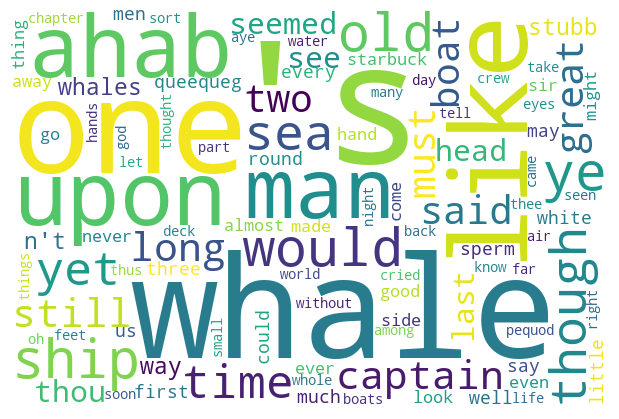

In [110]:
# make a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist_filtered)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [112]:
from nltk import pos_tag

# Tag the words with their part of speech
my_sentence = word_tokenize("And then, calamitously, there were no longer any delicious macaroons remaining in the cookie jar.")
pos_tag(my_sentence)

# see https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html for the tag set!

[('And', 'CC'),
 ('then', 'RB'),
 (',', ','),
 ('calamitously', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ('were', 'VBD'),
 ('no', 'DT'),
 ('longer', 'RBR'),
 ('any', 'DT'),
 ('delicious', 'JJ'),
 ('macaroons', 'NNS'),
 ('remaining', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('cookie', 'NN'),
 ('jar', 'NN'),
 ('.', '.')]

## Sentiment analysis

Let's try a sentiment analysis, using the VADER sentiment analyzer.  VADER, for "Valence Aware Dictionary and sEntiment Reasoner," is specifically designed for social media text and informal text in general, but it can be applied to other types of text as well.  Unlike some sentiment analysis tools, it's not based on supervised learning (i.e. learning to associate linguistic features with explicit sentiment labels for each document in the corpus).  Rather, the analyzer is a rule-based and lexicon-based approach that provides polarity scores for a given text based on its content. 

To use VADER, we need to import and instantiate an instance of the `SentimentIntensityAnalyzer` class:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', download_dir=data_dir)
sia = SentimentIntensityAnalyzer()

This class has three main components:

1. Lexicon: VADER has a built-in sentiment lexicon with intensity scores assigned to words, emoticons, and slang. The lexicon consists of over 7,500 lexical features, including words and phrases that express sentiment, along with their sentiment intensity scores ranging from -4 (extremely negative) to 4 (extremely positive).  
2. Grammatical and syntactical Rules: VADER considers grammar and syntax, such as negations, intensifiers, and the impact of punctuation marks, to adjust the sentiment intensity score. For example, the presence of a negation before a sentiment-laden word can flip the sentiment, while an exclamation mark can increase the intensity of the sentiment.
3. Aggregated Polarity Scores: SIA computes three polarity scores - positive, negative, and neutral - for a given text. It also provides a compound score, which is a single aggregated metric representing the overall sentiment. The compound score ranges from -1 (extremely negative) to 1 (extremely positive).

Let's see how it works on 2 snippets of text:

In [132]:
sample1 = 'Wow, what a brilliant time I had at the ball game.'
sample2 = 'Ugh, what a dreadful time with those vultures at the IRS.'

# Analyze the sentiment of the text
print(f"Sample 1: {sia.polarity_scores(sample1)}")
print(f"Sample 2: {sia.polarity_scores(sample2)}")

Sample 1: {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8225}
Sample 2: {'neg': 0.533, 'neu': 0.467, 'pos': 0.0, 'compound': -0.7906}


It doesn't do particularly well with sarcasm, but that's a hard problem requiring more sophisticated techniques that look at the context of a snippet of text:

In [133]:
sample3 = 'Wow, what a brilliant time I had with those amazingly helpful people at the IRS.'

# Analyze the sentiment of the text
print(f"Sample 3: {sia.polarity_scores(sample1)}")

Sample 3: {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8225}


Let's compare sentiment for all the resources in the Gutenberg corpus:

In [138]:
import pandas as pd
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [142]:
from tqdm import tqdm
def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

sentiment_scores_list = []

for _, fileid in tqdm(enumerate(inaugural.fileids())):
    text = inaugural.raw(fileid)
    sentiment_scores = get_sentiment_scores(text)
    sentiment_scores['document'] = fileid
    sentiment_scores_list.append(sentiment_scores)


59it [00:01, 54.79it/s]


In [143]:
# wrap up in a pandas data frame
sentiment_df = pd.DataFrame(sentiment_scores_list)
sentiment_df = sentiment_df[['document', 'pos', 'neu', 'neg', 'compound']]
print(sentiment_df)

               document    pos    neu    neg  compound
0   1789-Washington.txt  0.239  0.711  0.050    0.9999
1   1793-Washington.txt  0.083  0.883  0.034    0.7845
2        1797-Adams.txt  0.259  0.692  0.049    1.0000
3    1801-Jefferson.txt  0.222  0.697  0.081    0.9999
4    1805-Jefferson.txt  0.179  0.764  0.056    0.9998
5      1809-Madison.txt  0.179  0.772  0.050    0.9992
6      1813-Madison.txt  0.154  0.715  0.131    0.9794
7       1817-Monroe.txt  0.222  0.721  0.057    1.0000
8       1821-Monroe.txt  0.194  0.741  0.066    1.0000
9        1825-Adams.txt  0.206  0.739  0.054    0.9999
10     1829-Jackson.txt  0.199  0.770  0.031    0.9996
11     1833-Jackson.txt  0.185  0.762  0.053    0.9996
12    1837-VanBuren.txt  0.199  0.708  0.093    0.9999
13    1841-Harrison.txt  0.179  0.747  0.074    1.0000
14        1845-Polk.txt  0.187  0.743  0.070    1.0000
15      1849-Taylor.txt  0.237  0.728  0.034    0.9998
16      1853-Pierce.txt  0.217  0.700  0.083    1.0000
17    1857

Let's make a line graph of the negative sentiment scores over time:

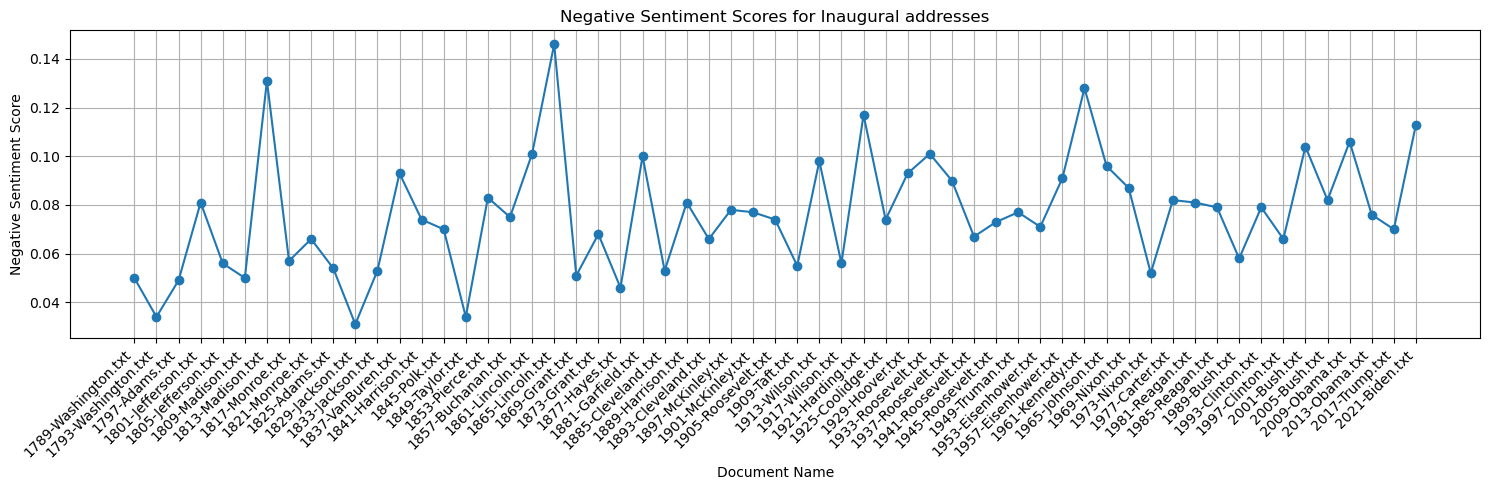

In [148]:
plt.figure(figsize=(15, 5))
plt.plot(sentiment_df.index, sentiment_df['neg'], marker='o', linestyle='-')
plt.xticks(sentiment_df.index, sentiment_df['document'], rotation=45, ha='right')
plt.xlabel('Document Name')
plt.ylabel('Negative Sentiment Score')
plt.title('Negative Sentiment Scores for Inaugural addresses')
plt.grid(True)
plt.tight_layout()
plt.show()


Because they are political acts, inaugural addresses skew towards a positive valence.  But a careful look reveals that negative sentiment scores seem to spike at times of national tragedies or major negative events: I notice spikes for the War of 1812, the Civil War, World War I, 9/11, the 2008 financial crisis, and Covid.  An interesting outlier is JFK's 1961 inaugural at the height of the Cold War.  This speech was most famous for the phrase "Ask not what your country can do for you – ask what you can do for your country," and here it is ranked as the third most negative inaugural address of all time.  Historians probably wouldn't agree!  JFK did, however, use phrases like the following, despite striking a mostly optimistic note about America's place in the world:  
- "we shall pay any price, bear any burden, meet any hardship, support any friend, oppose any foe to assure the survival and success of liberty." 
- "a struggle against the common enemies of man: tyranny, poverty, disease and war itself."   
- "half the globe struggling to break the bonds of mass misery"  
- "we pledge our word that one form of colonial control shall not have passed away merely to be replaced by a far more iron tyranny."
- "both sides overburdened by the cost of modern weapons, both rightly alarmed by the steady spread of the deadly atom, yet both racing to alter that uncertain balance of terror that stays the hand of mankind's final war."  

So from some of the "negative valence" words, you can see why this one ends up with a higher-than-average negative sentiment score.   